In [55]:
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install pydotplus
# !pip install numpy
# !pip install pandas

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.naive_bayes import GaussianNB
# import sklearn as skl
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn import metrics 
# import pydotplus


penguins = pd.read_csv("penguins.csv")

In [61]:
# drop null or not number rows, convert categorical features to numericals
penguins = penguins.dropna()
penguins.sex = pd.get_dummies(penguins.sex)
penguins.island = pd.Categorical(penguins.island, categories=penguin.island.unique()).codes
penguins.species = pd.Categorical(penguins.species, categories=penguin.species.unique()).codes

In [63]:
penguins 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


In [66]:
penguin = sns.load_dataset('penguins')

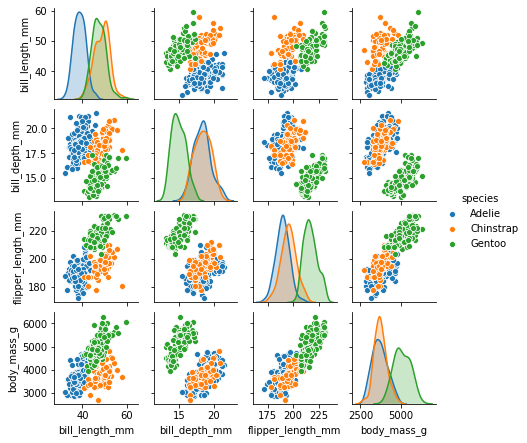

In [67]:
sns.pairplot(penguin, hue='species',height=1.5)

In [105]:
X_penguin = penguins.drop(['species'], axis=1)
y_penguin = penguins['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguin, y_penguin, test_size=0.2, random_state=1)

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)
ypred = pd.Series(y_model, name='prediction')
predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

0.9402985074626866


,index,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,index,species,prediction
0,65,1,41.6,18.0,192.0,3950.0,0,65,0,0
1,276,1,43.8,13.9,208.0,4300.0,1,276,2,2
2,186,2,49.7,18.6,195.0,3600.0,0,186,1,1
3,198,2,50.1,17.9,190.0,3400.0,1,198,1,1
4,293,1,46.5,14.8,217.0,5200.0,1,293,2,2
...,...,...,...,...,...,...,...,...,...,...
62,255,1,48.4,16.3,220.0,5400.0,0,255,2,2
63,138,2,37.0,16.5,185.0,3400.0,1,138,0,0
64,86,2,36.3,19.5,190.0,3800.0,0,86,0,0
65,79,0,42.1,19.1,195.0,4000.0,0,79,0,0
